In [1]:
"""
Authors: Abdul Samad            samad19472002@gmail.com
         Janzaib Masood         janzaibaloch786@gmail.com
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split # ,KFold
from sklearn.cross_validation import KFold

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fivethirtyeight')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Here you begin working on the data
df = pd.read_excel('Data.xlsx')

# Deleting the two mentioned columns from the dataframe
df.drop('VchMotherTounge', axis=1, inplace =True)
df.drop('MotherTongueBin', axis=1, inplace =True)
df.head()

,GenderCode,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability01,Lang1,Lang2,Lang3,Lang4,Religion,RESULT
0,0,3,3,3,2,1,0,1,0,0,0,1,FAIL
1,0,4,5,1,1,1,0,1,0,0,0,1,PASS
2,0,5,3,0,0,1,0,1,0,0,0,1,PASS
3,0,2,4,1,4,1,0,1,0,0,0,1,PASS
4,0,2,1,0,0,1,0,1,0,0,0,1,FAIL


In [3]:
# Slicing from main dataframe to Input Data(X) and output Data(y)
y = df.iloc[:, 12]
X = df.iloc[:,:12]
# Replacng PASS and FAIL with integers 1 and 0 respectively
y[y == 'PASS'] = 1
y[y == 'FAIL'] = 0
display(X.head())
display(y.head())

,GenderCode,IntBrothers,IntSisters,IntSchoolBrothers,IntSchoolSisters,ClassSchoolStatus,Disability01,Lang1,Lang2,Lang3,Lang4,Religion
0,0,3,3,3,2,1,0,1,0,0,0,1
1,0,4,5,1,1,1,0,1,0,0,0,1
2,0,5,3,0,0,1,0,1,0,0,0,1
3,0,2,4,1,4,1,0,1,0,0,0,1
4,0,2,1,0,0,1,0,1,0,0,0,1


0    0
1    1
2    1
3    1
4    0
Name: RESULT, dtype: object

In [4]:
a = y.values
b = X.values
del(y)
del(X)
X = []
Y = []
length = len(a)
for i in range(length):
    X.append(b[i,:])
    Y.append(a[i])

In [5]:
dTree  = DecisionTreeClassifier()  
logReg = LogisticRegression()
knn    = KNeighborsClassifier(n_neighbors=5)
rF     = RandomForestClassifier()
MLP    = MLPClassifier()

report = np.zeros((11, 5))

In [6]:
scores_dTree = cross_val_score(dTree, X, Y, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X, Y, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X, Y, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X, Y, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X, Y, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('Before Resampling of the real data: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[0, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

Before Resampling of the real data: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.496118236182 0.509189781938 0.507560502765 0.502879529674 0.520390718655


In [7]:
# Let's try Random Undersampling
rmun = RandomUnderSampler()
X_resampled, Y_resampled = rmun.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After applying Random Undersampling: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[1, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After applying Random Undersampling: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.440418957302 0.331147400257 0.469818712766 0.422817970605 0.372000093504


In [8]:
# Let's try Condensed Nearest Neighbour
cnn = CondensedNearestNeighbour()
X_resampled, Y_resampled = cnn.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After applying Condensed Nearest Neighbours: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[2, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After applying Condensed Nearest Neighbours: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.329966994795 0.416988281076 0.358006155606 0.281350828584 0.408957361875


In [9]:
# Let's try NearMiss
nm = NearMiss()
X_resampled, Y_resampled = nm.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After applying NearMiss: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[3, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After applying NearMiss: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.424171430332 0.617305627256 0.489123468717 0.449867503338 0.673992059718


In [10]:
# Let's try Edited Nearest Neighbour
enn = EditedNearestNeighbours()
X_resampled, Y_resampled = enn.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After applying Edited Nearest Neighbours: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[4, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After applying Edited Nearest Neighbours: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.666049926896 0.524898561075 0.668403219136 0.730359548926 0.572032118737


In [11]:
# Let's try Repeated Edited Nearest Neighbour
renn = RepeatedEditedNearestNeighbours()
X_resampled, Y_resampled = renn.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After applying Repeated Edited Nearest Neighbours: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[5, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After applying Repeated Edited Nearest Neighbours: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.834828585654 0.527254436502 0.860550606352 0.924528077101 0.690397862655


In [12]:
# Let's try Tomek Link Removal
tkLink = TomekLinks()
X_resampled, Y_resampled = tkLink.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After applying Tomek Link Removal: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[6, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After applying Tomek Link Removal: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.489380571853 0.511774231686 0.505590188824 0.513475205185 0.516573739323


In [13]:
# Let's try Random Oversampling
rmov = RandomOverSampler()
X_resampled, Y_resampled = rmov.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After applying Random Oversampling: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[7, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After applying Random Oversampling: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.728201154438 0.364267993757 0.718269040433 0.761615005177 0.505113149904


In [14]:
# Let's try SMOTE
sm = SMOTE(ratio = 'auto', kind = 'regular')
X_resampled, Y_resampled = sm.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After appling SMOTE: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[8, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After appling SMOTE: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.758341629332 0.35919774308 0.735444182694 0.803596405113 0.543419398933


In [15]:
# Let's try SMOTENN
sm_en = SMOTEENN()
X_resampled, Y_resampled = sm_en.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After appling SMOTENN: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[9, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After appling SMOTENN: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.862706378957 0.514447562415 0.943193804728 0.938768589303 0.698833294054


In [16]:
# Let's try SMOTE+Tomek Link removal
sm_tk = SMOTETomek()
X_resampled, Y_resampled = sm_tk.fit_sample(X, Y)

scores_dTree = cross_val_score(dTree, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_dTree = scores_dTree.mean()

scores_logReg = cross_val_score(logReg, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_logReg = scores_logReg.mean()

scores_knn = cross_val_score(knn, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_knn = scores_knn.mean()

scores_rF = cross_val_score(rF, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_rF = scores_rF.mean()

scores_MLP = cross_val_score(MLP, X_resampled, Y_resampled, cv = 10, scoring='roc_auc')
scores_MLP = scores_MLP.mean()

print('After appling SMOTE+Tomek Link Removal: ')
print('   dTree,       logReg   ,         KNN    ,       rF   ,           MLP')
print(scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP)

report[10, :] = [scores_dTree, scores_logReg, scores_knn, scores_rF, scores_MLP]

After appling SMOTE+Tomek Link Removal: 
   dTree,       logReg   ,         KNN    ,       rF   ,           MLP
0.754451660936 0.341385118177 0.734714382767 0.798183195368 0.504264858649


In [17]:
report = np.transpose(report)

print(report[0,:])
report.shape

[ 0.49611824  0.44041896  0.32996699  0.42417143  0.66604993  0.83482859
  0.48938057  0.72820115  0.75834163  0.86270638  0.75445166]


(5, 11)

In [18]:
Classifiers = ['DecisionTreeClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier',  'MLPClassifier']
Samplers = ['None','Random Undersampling', 'CNN', 'NearMiss', 'ENN', 'RENN','Tomek Links','SMOTE', 'Random Oversampling', 'SMOTEENN','SMOTETomek']

#del(df)
df = pd.DataFrame(report, columns = Samplers, index = Classifiers)
df

,None,Random Undersampling,CNN,NearMiss,ENN,RENN,Tomek Links,SMOTE,Random Oversampling,SMOTEENN,SMOTETomek
DecisionTreeClassifier,0.496118,0.440419,0.329967,0.424171,0.666050,0.834829,0.489381,0.728201,0.758342,0.862706,0.754452
LogisticRegression,0.509190,0.331147,0.416988,0.617306,0.524899,0.527254,0.511774,0.364268,0.359198,0.514448,0.341385
KNeighborsClassifier,0.507561,0.469819,0.358006,0.489123,0.668403,0.860551,0.505590,0.718269,0.735444,0.943194,0.734714
RandomForestClassifier,0.502880,0.422818,0.281351,0.449868,0.730360,0.924528,0.513475,0.761615,0.803596,0.938769,0.798183
MLPClassifier,0.520391,0.372000,0.408957,0.673992,0.572032,0.690398,0.516574,0.505113,0.543419,0.698833,0.504265


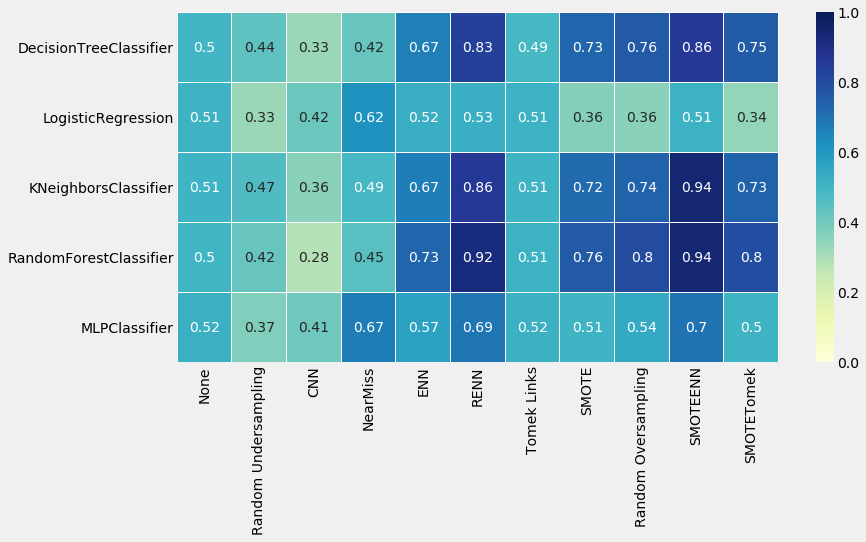

In [19]:
import seaborn as sns
plt.figure()
ax = sns.heatmap(report,xticklabels=Samplers, yticklabels=Classifiers, annot = True, vmin=0, vmax=1, linewidth=0.1, cmap="YlGnBu",)
plt.savefig("output.png")